## House Rental Prediction

### Importing Standard Libraries

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Data 

In [228]:
df = pd.read_csv('house_rental_data.csv.txt')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [229]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
Sqft           645 non-null float64
Floor          645 non-null int64
TotalFloor     645 non-null int64
Bedroom        645 non-null int64
Living.Room    645 non-null int64
Bathroom       645 non-null int64
Price          645 non-null int64
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [231]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


#####  Checking distrubiton of Price Column

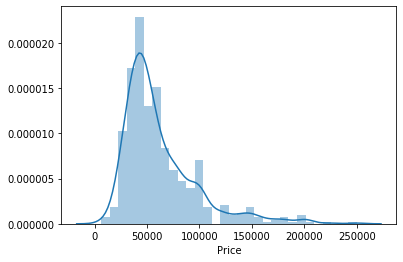

In [232]:
sns.distplot(df['Price'])

In [233]:
print('Skewness: ',df['Price'].skew())
print('Kurtosis: ',df['Price'].kurt())

Skewness:  1.8377730040518983
Kurtosis:  4.118474651667858


We can see due to long tails kurtosis value reached 4

##### Lets check pairplot and heatmap

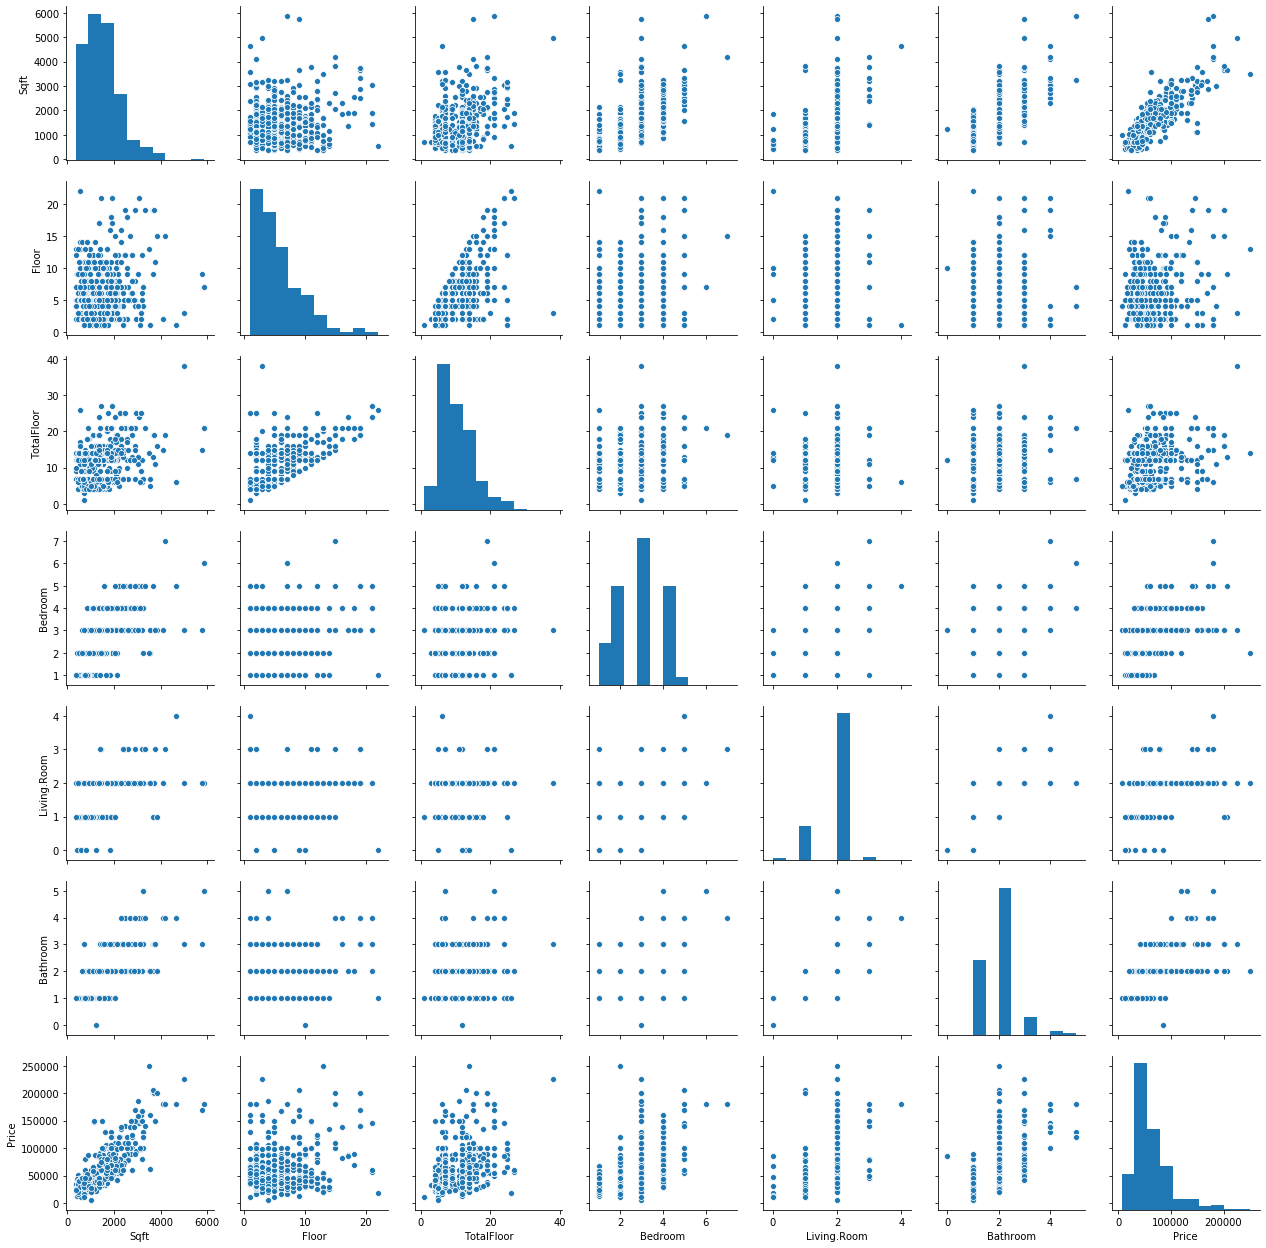

In [234]:
sns.pairplot(df)

what we can see
1)sqft and price has best relation
2)totalfloor >= floor

(7.0, 0.0)

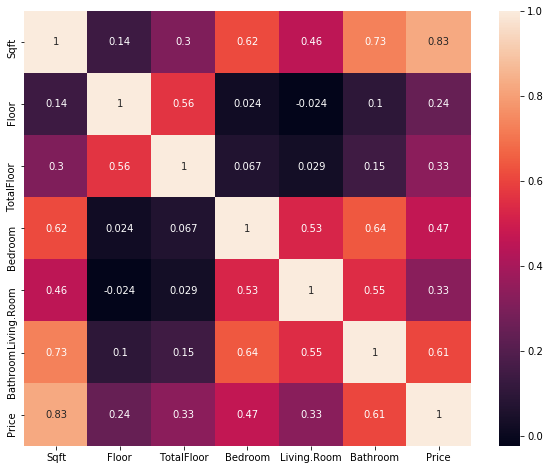

In [235]:
plt.figure(figsize = (10,8))
ax = sns.heatmap(df.corr(),annot = True)
b,t = ax.get_ylim()
ax.set_ylim(b+0.5,t-0.5)

##### Checking for outliers

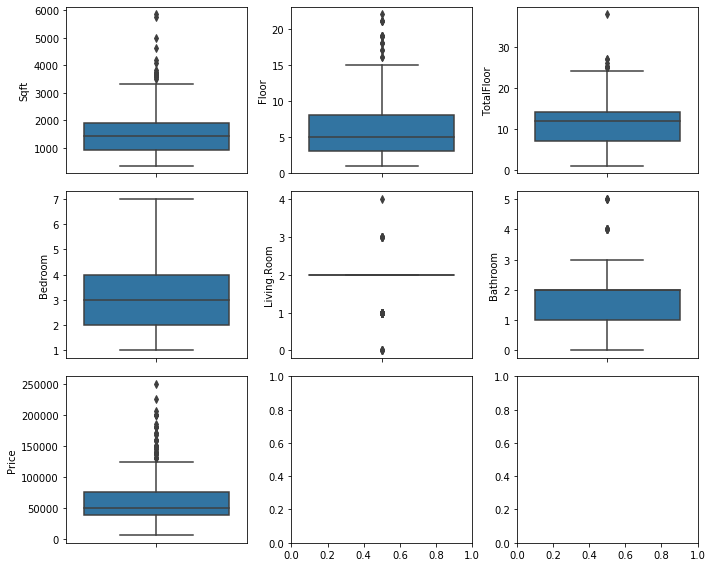

In [236]:
my_col = df.columns.tolist()
fig,axes = plt.subplots(3,3,figsize = (10,8))
# fig = (figsize = (10,8))
for i in range(len(my_col)):
    if i<3:
        sns.boxplot(y =df[my_col[i]], ax = axes[0,i])
    elif 3<=i<6:
        sns.boxplot(y=df[my_col[i]],ax = axes[1,i-3])
    else:
        sns.boxplot(y =df[my_col[i]],ax = axes[2,0])
plt.tight_layout()

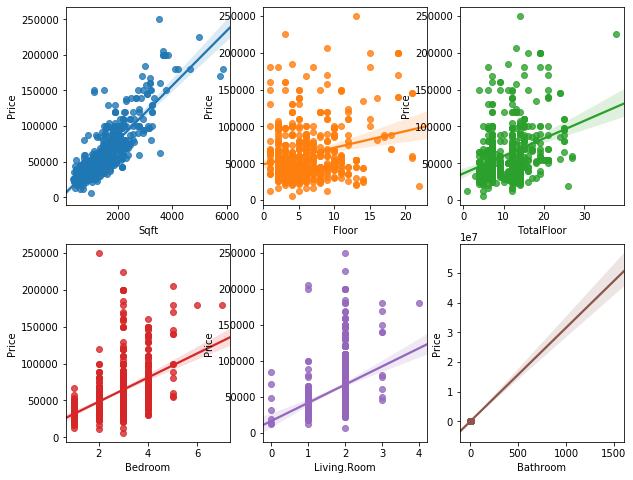

In [237]:
my_col = df.columns.tolist()
fig,axes = plt.subplots(2,3,figsize = (10,8))
for i in range(len(my_col)-1):
    if i<3:
        sns.regplot(x =df[my_col[i]],y= df['Price'], ax = axes[0,i])
    else:
        sns.regplot(x=df[my_col[i]],y = df['Price'], ax = axes[1,i-3])

##### As we can see outliers not much affecting the regression so we can keep them

### Data Preprocessing

##### Imputation

In [238]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

#### Spliting X and y

In [241]:
X = df.drop('Price',axis = 1)
y = df['Price']

In [242]:
print(X.shape)
print(y.shape)


(645, 6)
(645,)


#### Feature Scaling

In [243]:
from sklearn.preprocessing import MinMaxScaler
rs= MinMaxScaler()
rs

MinMaxScaler(copy=True, feature_range=(0, 1))

In [244]:
my_col = X.columns.tolist()
X[my_col] = rs.fit_transform(X[my_col])
X.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
0,0.148867,0.047619,0.162162,0.166667,0.5,0.4
1,0.322977,0.190476,0.162162,0.500000,0.5,0.4
2,0.141748,0.190476,0.162162,0.166667,0.5,0.2
3,0.200000,0.047619,0.162162,0.333333,0.5,0.4
4,0.110680,0.476190,0.351351,0.333333,0.5,0.4


### Train_Test_Split

In [245]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(483, 6)
(162, 6)
(483,)
(162,)


### Fitting Model

In [246]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [247]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [248]:
lr.score(X_train,y_train)

0.6911471765058177

0.6911471765058178

### Predictions and Evaluations

In [249]:
y_pred = lr.predict(X_test)

In [250]:
from sklearn.metrics import r2_score

In [251]:
r2_score(y_pred,y_test)

0.5747036045326434

### KNN Regression

In [252]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [253]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [254]:
knn.score(X_train,y_train)

0.7878720404680783

In [255]:
y_pred = knn.predict(X_test)
r2_score(y_pred,y_test)

0.28816486587233014

In [256]:
r2_score_list = []
k = list(range(1,31))
for i in range(1,31):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    r2_score_list.append(r2_score(y_pred,y_test))

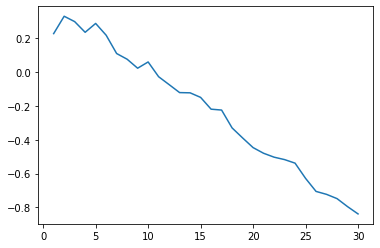

In [257]:
plt.plot(k,r2_score_list)

#### Conclusion